In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [20]:
df = pd.read_csv('../COD3/ML471_S1_Datafile_Concept.csv')
df.head()

,DATE,Consumption,Festivals/Special_events
0,01-01-1988,107.5052,6
1,02-01-1988,105.6720,1
2,03-01-1988,97.4502,1
3,04-01-1988,92.4714,1
4,05-01-1988,90.3151,1


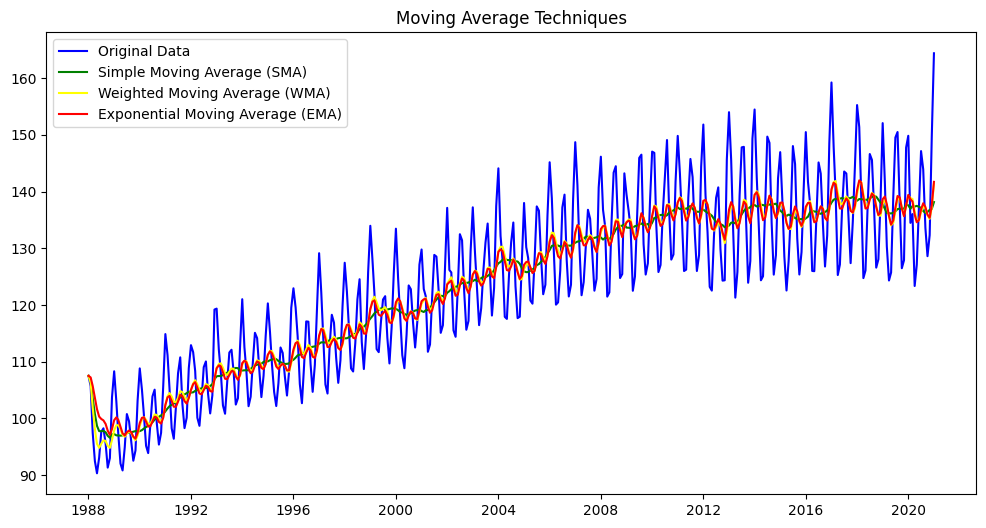

In [21]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

window_size = 12

df['SMA'] = df['Consumption'].rolling(window=window_size, min_periods=1).mean()

def wma(x):
    weights = np.arange(1, len(x) + 1)
    return np.dot(x, weights) / weights.sum()

df['WMA'] = df['Consumption'].rolling(window=window_size, min_periods=1).apply(wma, raw=True)

df['EMA'] = df['Consumption'].ewm(span=window_size, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Consumption'], label='Original Data', color='blue')
plt.plot(df.index, df['SMA'], label='Simple Moving Average (SMA)', color='green')
plt.plot(df.index, df['WMA'], label='Weighted Moving Average (WMA)', color='yellow')
plt.plot(df.index, df['EMA'], label='Exponential Moving Average (EMA)', color='red')

plt.title('Moving Average Techniques')
plt.legend(loc='upper left')


plt.show()